In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\\Users\\Noor Ahmed\\OneDrive\\Desktop\\projecr\emails_v2.csv")
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
2038  Subject: the installation of the equipment you...     0
2039  Subject: all about current and near future gas...     0
2040  Subject: maureen ' s expenses  it appears that...     0
2041  Subject: interview - numerical methods & finan...     0
2042  Subject: sevil yaman  hi norma ,  sevil ' s pr...     0

[2043 rows x 2 columns]


In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df.tail()

,text,spam
2038,Subject: the installation of the equipment you...,0
2039,Subject: all about current and near future gas...,0
2040,Subject: maureen ' s expenses it appears that...,0
2041,Subject: interview - numerical methods & finan...,0
2042,"Subject: sevil yaman hi norma , sevil ' s pr...",0


In [7]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
df.dtypes

text    object
spam     int64
dtype: object

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2038    False
2039    False
2040    False
2041    False
2042    False
Length: 2043, dtype: bool

In [10]:
from sklearn.preprocessing import LabelEncoder
df.columns

Index(['text', 'spam'], dtype='object')

In [11]:
lb=LabelEncoder()
df["text"]=lb.fit_transform(df["text"])
df["spam"]=lb.fit_transform(df["spam"])

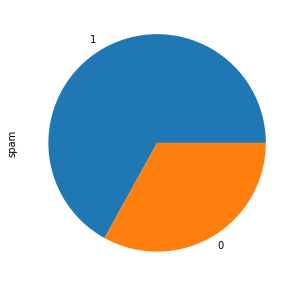

In [13]:
s= df['spam'].value_counts().plot(kind='pie', figsize=(5,5))

In [14]:
x=df.drop("spam",axis=1)
y=df["spam"]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2043, 1)
(2043,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1634, 1)
(1634,)
(409, 1)
(409,)


# BUILD THE MODEL

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
def mscore(model):
    print("training score",model.score(x_train,y_train))
    print("testing score",model.score(x_test,y_test))
def gen_metrics(y_test,ypred):
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mse)
    print(mae)
    print(mse)
    print(rmse)
def gen_matrix(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    print(accuracy_score(y_test,ypred))


# 1)DECISION TREE CLASSIFIER MODEL

In [20]:
m1=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=20)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20)

In [21]:
print(m1.score(x_train,y_train))

0.7876376988984088


In [22]:
print(m1.score(x_test,y_test))

0.7921760391198044


In [23]:
ypred_m1=m1.predict(x_test)

In [24]:
print(ypred_m1)

[1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1]


In [25]:
gen_metrics(y_test,ypred_m1)

0.2078239608801956
0.2078239608801956
0.4558771335351178


In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
cm=confusion_matrix(ypred_m1,y_test)
print(cm)
print(classification_report(ypred_m1,y_test))
print(accuracy_score(ypred_m1,y_test))

[[ 59  15]
 [ 70 265]]
              precision    recall  f1-score   support

           0       0.46      0.80      0.58        74
           1       0.95      0.79      0.86       335

    accuracy                           0.79       409
   macro avg       0.70      0.79      0.72       409
weighted avg       0.86      0.79      0.81       409

0.7921760391198044


In [28]:
from sklearn.tree import plot_tree

Index(['text'], dtype='object')
['>=50', '<=50']


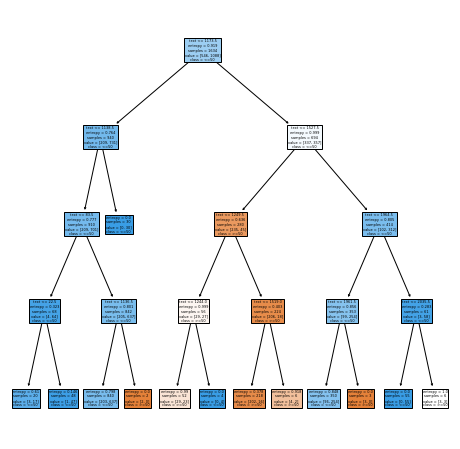

In [29]:
fn=x_train.columns
cn=['>=50','<=50']
print(fn)
print(cn)
plt.figure(figsize=(8,8))
plt.rc('font', size=20)
plt.rc('axes', titlesize=10)
plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

# 2)LOGISTIC REGRESSION MODEL

In [30]:
m2=LogisticRegression(max_iter=1000)

In [31]:
m2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
mscore(m2)

training score 0.6658506731946144
testing score 0.684596577017115


In [33]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [34]:
gen_metrics(ypred_m2,y_test)

0.3154034229828851
0.3154034229828851
0.5616078907769059


In [35]:
gen_matrix(ypred_m2,y_test)

[[  0   0]
 [129 280]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.68      0.81       409

    accuracy                           0.68       409
   macro avg       0.50      0.34      0.41       409
weighted avg       1.00      0.68      0.81       409

0.684596577017115


C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3)KNN CLASSIFIER

In [36]:
m3=KNeighborsClassifier(n_neighbors=125)

In [37]:
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=125)

In [38]:
mscore(m3)

training score 0.7741738066095472
testing score 0.7970660146699267


In [39]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1]


In [40]:
gen_metrics(ypred_m3,y_test)

0.20293398533007334
0.20293398533007334
0.45048194784039164


In [41]:
gen_matrix(ypred_m3,y_test)

[[ 56  10]
 [ 73 270]]
              precision    recall  f1-score   support

           0       0.43      0.85      0.57        66
           1       0.96      0.79      0.87       343

    accuracy                           0.80       409
   macro avg       0.70      0.82      0.72       409
weighted avg       0.88      0.80      0.82       409

0.7970660146699267


# 4)SUPPORT VECTOR CLASSIFIER

In [42]:
from sklearn.svm import SVC
m4=SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [43]:
mscore(m4)

training score 0.6658506731946144
testing score 0.684596577017115


In [44]:
ypred_m4=m4.predict(x_test)

In [45]:
print(ypred_m4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [46]:
gen_metrics(ypred_m4,y_test)

0.3154034229828851
0.3154034229828851
0.5616078907769059


In [47]:
gen_matrix(ypred_m4,y_test)

[[  0   0]
 [129 280]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.68      0.81       409

    accuracy                           0.68       409
   macro avg       0.50      0.34      0.41       409
weighted avg       1.00      0.68      0.81       409

0.684596577017115


C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Noor Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5)RANDOM FOREST CLASSIFIER

In [48]:
m5=RandomForestClassifier()
m5.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
mscore(m5)

training score 0.9999616093366094
testing score 0.8578228159066482


In [41]:
ypred_m5=m5.predict(x_test)

In [42]:
print(ypred_m5)

[1 0 0 ... 0 0 0]


In [43]:
gen_metrics(ypred_m5,y_test)

0.14217718409335176
0.14217718409335176
0.37706389921782724


In [44]:
gen_matrix(ypred_m5,y_test)

[[4635  577]
 [ 349  952]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5212
           1       0.62      0.73      0.67      1301

    accuracy                           0.86      6513
   macro avg       0.78      0.81      0.79      6513
weighted avg       0.87      0.86      0.86      6513

0.8578228159066482


THE ACCURACY SCORES ARE:
    DECISION TREE CLASSIFIER:0.841087056655919
    LOGISTIC REGRESSION:0.7851988331030247
    KNN CLASSIFIER:0.7805926608321818
    RANDON FOREST CLASSIFIER:0.8621219100261016
        
    